In [76]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from sklearn import model_selection
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [77]:
data_filename = "SMSSpamCollection"
data = []
with open(data_filename, 'r') as file:
    data = file.read().splitlines()

In [78]:
def make_corpus(data):
    X = []
    Y = []
    for line in data:
        parts = line.split()
        sms_type = parts[0]
        mark = 0 if sms_type == 'ham' else 1
        X.append(" ".join(parts[1:]))
        Y.append(mark)
    return X, np.array(Y)

In [79]:
corpus, Y = make_corpus(data)

In [81]:
hv = HashingVectorizer(n_features=500)
X = hv.transform(corpus)

In [82]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,\
                                                                                Y,\
                                                                                test_size=validation_size,\
                                                                                random_state=seed)

In [83]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Set up algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

In [84]:
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.957841 (0.007205)
KNN: 0.926668 (0.020930)
CART: 0.947075 (0.014288)


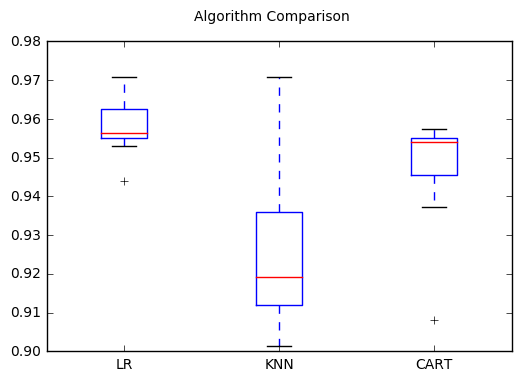

In [85]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [86]:
# Make predictions on validation dataset
print('Prediction test with kNN classifier:\n')
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print('Accuracy score: ', accuracy_score(Y_validation, predictions))
print('Confusion matrix:\n', confusion_matrix(Y_validation, predictions))
print('Classification report:\n', classification_report(Y_validation, predictions))

Prediction test with kNN classifier:

Accuracy score:  0.921076233184
Confusion matrix:
 [[958   1]
 [ 87  69]]
Classification report:
              precision    recall  f1-score   support

          0       0.92      1.00      0.96       959
          1       0.99      0.44      0.61       156

avg / total       0.93      0.92      0.91      1115

